<a id='exec-sum'></a>
## EXECUTIVE SUMMARY

### *WatkinsQ Lambda Method*:

|Parameters| | Rewards |
:---        |    :----:   |  :----  |
|lambda: 1, eps: 0.1, gamma: 0.9, alpha:0.1, iteration: 1000| | 200 |
|lambda: 0.95, eps: 0.1, gamma: 0.9, alpha:0.1, iteration: 1000||  200 |
|lambda: 0, eps: 0.1, gamma: 0.9, alpha:0.1, iteration: 1000| | 188| 
|       |   |
|lambda: 1, eps: 0.1, gamma: 0.9, alpha:0.3, iteration: 1000| |166|
|lambda: 1, eps: 0.1, gamma: 0.9, alpha:0.5, iteration: 1000| |200|
|lambda: 1, eps: 0.1, gamma: 0.7, alpha:0.1, iteration: 1000| |82|
|lambda: 1, eps: 0.1, gamma: 0.5, alpha:0.1, iteration: 1000| |86|
|lambda: 1, eps: 0.1, gamma: 0.7, alpha:0.3, iteration: 1000| |155|
|lambda: 1, eps: 0.1, gamma: 0.5, alpha:0.5 ,iteration: 1000| |16|


#### *Results*:

Under the same gamma,epsilon and alpha parameters, lambda is equal 0.95 or 1, cart pole handles with keeping balance the rod. However, lambda is set to 0, although results are satisfied, cart pole cannot reach maximum reward. 

When lambda and alpha is equal 1 and 0.1, gamma decreases 0.9 to 0.5 (step size = 0.2). Decreasing gamma occurs to not obtain desirable results. After 1000 iterations, cart pole cannot handles with keeping balance the rod. Thus number of iterations can be increased for reaching to accessible results. 

In [2]:
pip install gym==0.21.0

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pyglet

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.kernel_approximation import RBFSampler
from sklearn.preprocessing import PolynomialFeatures
import time
import gym
from datetime import datetime

In [5]:
gym.version.VERSION

'0.21.0'

In [6]:
env = gym.make("CartPole-v0")

In [7]:
s=env.reset()
s

array([0.00919645, 0.00462873, 0.01401694, 0.03524411], dtype=float32)

In [8]:
a=env.action_space.sample() #random action
a

1

In [9]:
s_next, r, done, info = env.step(a)

In [10]:
env.reset()
done=False
while not done:
    a=env.action_space.sample() #random action
    s_next, r, done, info = env.step(a)
    time.sleep(0.05)
    env.render()
env.close()

In [11]:
def merge_state_action(s, a):
    return np.concatenate((s, [a]))

In [12]:
s=env.reset()
a=env.action_space.sample()
sa=merge_state_action(s, a)
sa

array([ 0.00777503, -0.01877255,  0.0205304 ,  0.03878588,  0.        ])

In [13]:
def gather_samples(n_episodes=10000):
    samples = []
    for i in range(n_episodes):
        s = env.reset()
        done=False
        while not done:
            a=env.action_space.sample() #random action
            sa = merge_state_action(s, a)
            samples.append(sa)
            s, r, done, info = env.step(a)
    return samples

In [14]:
samples=gather_samples(n_episodes=10000)
samples

[array([ 0.04555855,  0.01576147,  0.00967886, -0.00154553,  0.        ]),
 array([ 0.04587378, -0.17949794,  0.00964795,  0.29417542,  0.        ]),
 array([ 0.04228382, -0.3747561 ,  0.01553146,  0.58988547,  1.        ]),
 array([ 0.0347887 , -0.17985503,  0.02732917,  0.3021352 ,  1.        ]),
 array([0.0311916 , 0.01486697, 0.03337187, 0.01819503, 0.        ]),
 array([ 0.03148894, -0.18071729,  0.03373577,  0.32121757,  1.        ]),
 array([0.02787459, 0.0139084 , 0.04016012, 0.03936159, 1.        ]),
 array([ 0.02815276,  0.20843214,  0.04094736, -0.24038483,  0.        ]),
 array([0.0323214 , 0.0127499 , 0.03613966, 0.06492764, 0.        ]),
 array([ 0.0325764 , -0.18287106,  0.03743821,  0.36879024,  0.        ]),
 array([ 0.02891898, -0.37850443,  0.04481402,  0.6730389 ,  1.        ]),
 array([ 0.02134889, -0.18403307,  0.05827479,  0.39479563,  0.        ]),
 array([ 0.01766823, -0.37993139,  0.06617071,  0.70526743,  0.        ]),
 array([ 0.0100696 , -0.57590479,  0.080

In [15]:
rbf_feature = RBFSampler(n_components=100)
rbf_feature.fit(samples)

RBFSampler()

In [16]:
def predictQ(s,a,w,kernel):
    sa = merge_state_action(s, a)
    if kernel=='poly':
        poly_features.fit([sa])
        x=poly_features.transform([sa])[0]
    elif kernel=='rbf':
        x = rbf_feature.transform([sa])[0]
    else:
        x=nystrom_featurizer.transform([sa])[0]
    return np.dot(x,w)

In [17]:
def gradientQ(s,a,kernel):
    sa = merge_state_action(s, a)
    if kernel=='poly':
        poly_features.fit([sa])
        x=poly_features.transform([sa])[0]
    elif kernel=='rbf':
        x = rbf_feature.transform([sa])[0]
    else:
        x=nystrom_featurizer.transform([sa])[0]
    return x

In [18]:
env.action_space.n

2

In [19]:
def predictQ_all_actions(s,w,kernel):
    values=[]
    for a in range(env.action_space.n):
        values.append(predictQ(s,a,w,kernel))
    return values

In [20]:
def epsilon_greedy(s, w, kernel, eps=0.1):
    values=[]
    p = np.random.random()
    if p < (1 - eps):
        values = predictQ_all_actions(s,w,kernel)
        return np.argmax(values)
    else:
        return env.action_space.sample()

In [21]:
def watch_agent(w,kernel):
    done = False
    episode_reward = 0
    s = env.reset()
    while not done:
        a = epsilon_greedy(s, w, kernel,eps=0)
        s, r, done, info = env.step(a)
        time.sleep(0.05)
        env.render()
        episode_reward += r
    print("Episode reward:", episode_reward)

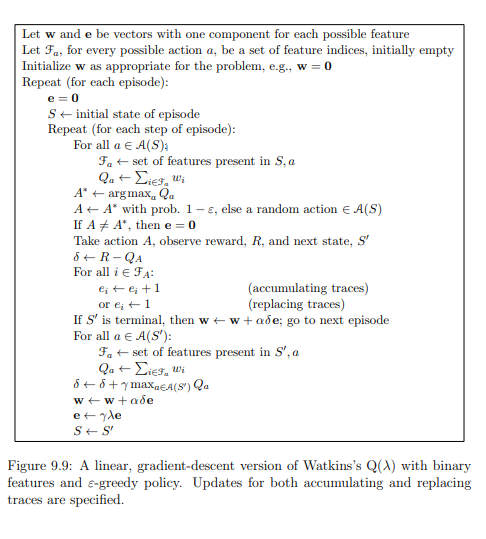

## Observing Results Different Lambda Values

### Lambda =1  & GAMMA = 0.9 & ALPHA = 0.1

In [22]:
LAMBDA = 1
GAMMA=0.9
ALPHA = 0.1

#Initialize weights as zero
w = np.zeros(100)
n_episodes = 1000
for it in range(n_episodes):
    e = np.zeros(100)
    print('İteration',it)
    # begin a new episode
    start = datetime.now()
    s=env.reset()
    done=False
    while not done:
        Qa= predictQ_all_actions(s,w,kernel='rbf')

        a2 = np.argmax(Qa)
        a = epsilon_greedy(s, w, kernel='rbf',eps=0.1)
        
        if a == a2:
            e = 0
            
        s2, r, done, info = env.step(a)
        e =  gradientQ(s,a,kernel='rbf')+1 # Accumulating traces
        DELTA = r- predictQ(s,a,w,kernel='rbf')
        
        
        if done:
            w = w+ALPHA*DELTA*e

        Qa = predictQ_all_actions(s2,w,kernel = 'rbf')
        DELTA =  DELTA + GAMMA*np.max(Qa)
                
        # update the weights
        w = w + ALPHA*DELTA*e
        e = GAMMA*LAMBDA*e
                
        # update state
        s = s2 
        
    print(datetime.now() - start)
    print('###############################################################################################################')   

İteration 0
0:00:00.009973
###############################################################################################################
İteration 1
0:00:00.057846
###############################################################################################################
İteration 2
0:00:00.024933
###############################################################################################################
İteration 3
0:00:00.010970
###############################################################################################################
İteration 4
0:00:00.010971
###############################################################################################################
İteration 5
0:00:00.011968
###############################################################################################################
İteration 6
0:00:00.011968
###############################################################################################################
İteration 7
0:00:00.007979


0:00:00.013963
###############################################################################################################
İteration 68
0:00:00.018950
###############################################################################################################
İteration 69
0:00:00.026930
###############################################################################################################
İteration 70
0:00:00.024932
###############################################################################################################
İteration 71
0:00:00.010969
###############################################################################################################
İteration 72
0:00:00.016953
###############################################################################################################
İteration 73
0:00:00.011969
###############################################################################################################
İteration 74
0:00:00.028924
#####

0:00:00.054855
###############################################################################################################
İteration 132
0:00:00.016955
###############################################################################################################
İteration 133
0:00:00.011967
###############################################################################################################
İteration 134
0:00:00.020946
###############################################################################################################
İteration 135
0:00:00.033910
###############################################################################################################
İteration 136
0:00:00.013964
###############################################################################################################
İteration 137
0:00:00.025931
###############################################################################################################
İteration 138
0:00:00.02692

0:00:00.073803
###############################################################################################################
İteration 198
0:00:00.015956
###############################################################################################################
İteration 199
0:00:00.030920
###############################################################################################################
İteration 200
0:00:00.012964
###############################################################################################################
İteration 201
0:00:00.016954
###############################################################################################################
İteration 202
0:00:00.036902
###############################################################################################################
İteration 203
0:00:00.019947
###############################################################################################################
İteration 204
0:00:00.02992

0:00:00.060837
###############################################################################################################
İteration 257
0:00:00.018950
###############################################################################################################
İteration 258
0:00:00.012967
###############################################################################################################
İteration 259
0:00:00.016953
###############################################################################################################
İteration 260
0:00:00.014962
###############################################################################################################
İteration 261
0:00:00.019944
###############################################################################################################
İteration 262
0:00:00.013963
###############################################################################################################
İteration 263
0:00:00.01795

0:00:00.014958
###############################################################################################################
İteration 320
0:00:00.016955
###############################################################################################################
İteration 321
0:00:00.037899
###############################################################################################################
İteration 322
0:00:00.005985
###############################################################################################################
İteration 323
0:00:00.029920
###############################################################################################################
İteration 324
0:00:00.032911
###############################################################################################################
İteration 325
0:00:00.014960
###############################################################################################################
İteration 326
0:00:00.03789

0:00:00.008975
###############################################################################################################
İteration 380
0:00:00.020944
###############################################################################################################
İteration 381
0:00:00.015957
###############################################################################################################
İteration 382
0:00:00.016955
###############################################################################################################
İteration 383
0:00:00.005984
###############################################################################################################
İteration 384
0:00:00.017952
###############################################################################################################
İteration 385
0:00:00.016956
###############################################################################################################
İteration 386
0:00:00.02194

0:00:00.022939
###############################################################################################################
İteration 448
0:00:00.005983
###############################################################################################################
İteration 449
0:00:00.006982
###############################################################################################################
İteration 450
0:00:00.005984
###############################################################################################################
İteration 451
0:00:00.003989
###############################################################################################################
İteration 452
0:00:00.004988
###############################################################################################################
İteration 453
0:00:00.005984
###############################################################################################################
İteration 454
0:00:00.02393

0:00:00.007979
###############################################################################################################
İteration 522
0:00:00.012966
###############################################################################################################
İteration 523
0:00:00.004985
###############################################################################################################
İteration 524
0:00:00.010972
###############################################################################################################
İteration 525
0:00:00.005984
###############################################################################################################
İteration 526
0:00:00.006981
###############################################################################################################
İteration 527
0:00:00.005985
###############################################################################################################
İteration 528
0:00:00.00997

0:00:00.018949
###############################################################################################################
İteration 589
0:00:00.004986
###############################################################################################################
İteration 590
0:00:00.013964
###############################################################################################################
İteration 591
0:00:00.009972
###############################################################################################################
İteration 592
0:00:00.005984
###############################################################################################################
İteration 593
0:00:00.014960
###############################################################################################################
İteration 594
0:00:00.014961
###############################################################################################################
İteration 595
0:00:00.04388

0:00:00.011969
###############################################################################################################
İteration 652
0:00:00.015956
###############################################################################################################
İteration 653
0:00:00.008978
###############################################################################################################
İteration 654
0:00:00.004985
###############################################################################################################
İteration 655
0:00:00.005984
###############################################################################################################
İteration 656
0:00:00.006981
###############################################################################################################
İteration 657
0:00:00.007980
###############################################################################################################
İteration 658
0:00:00.00798

0:00:00.006983
###############################################################################################################
İteration 725
0:00:00.007977
###############################################################################################################
İteration 726
0:00:00.005985
###############################################################################################################
İteration 727
0:00:00.005984
###############################################################################################################
İteration 728
0:00:00.005984
###############################################################################################################
İteration 729
0:00:00.005984
###############################################################################################################
İteration 730
0:00:00.006981
###############################################################################################################
İteration 731
0:00:00.00498

0:00:00.016956
###############################################################################################################
İteration 800
0:00:00.006980
###############################################################################################################
İteration 801
0:00:00.006981
###############################################################################################################
İteration 802
0:00:00.007980
###############################################################################################################
İteration 803
0:00:00.008975
###############################################################################################################
İteration 804
0:00:00.007979
###############################################################################################################
İteration 805
0:00:00.005985
###############################################################################################################
İteration 806
0:00:00.00797

0:00:00.005984
###############################################################################################################
İteration 874
0:00:00.006982
###############################################################################################################
İteration 875
0:00:00.006982
###############################################################################################################
İteration 876
0:00:00.007979
###############################################################################################################
İteration 877
0:00:00.006981
###############################################################################################################
İteration 878
0:00:00.004987
###############################################################################################################
İteration 879
0:00:00.005983
###############################################################################################################
İteration 880
0:00:00.00798

0:00:00.006981
###############################################################################################################
İteration 949
0:00:00.007979
###############################################################################################################
İteration 950
0:00:00.009973
###############################################################################################################
İteration 951
0:00:00.005984
###############################################################################################################
İteration 952
0:00:00.013964
###############################################################################################################
İteration 953
0:00:00.027924
###############################################################################################################
İteration 954
0:00:00.024934
###############################################################################################################
İteration 955
0:00:00.00797

In [23]:
watch_agent(w,kernel='rbf')
env.close()

Episode reward: 11.0


### Lambda =0.95  & GAMMA = 0.9 & ALPHA = 0.1

In [48]:
LAMBDA = 0.95
GAMMA=0.9
ALPHA = 0.1

#Initialize weights as zero
w = np.zeros(100)
n_episodes = 1000
for it in range(n_episodes):
    e = np.zeros(100)
    print('İteration',it)
    # begin a new episode
    start = datetime.now()
    s=env.reset()
    done=False
    while not done:
        Qa= predictQ_all_actions(s,w,kernel='rbf')

        a2 = np.argmax(Qa)
        a = epsilon_greedy(s, w, kernel='rbf',eps=0.1)
        
        if a == a2:
            e = 0
            
        s2, r, done, info = env.step(a)
        e = gradientQ(s,a,kernel='rbf')
        DELTA = r- predictQ(s,a,w,kernel='rbf')
        
        if done:
            w = w+ALPHA*DELTA*e

        Qa = predictQ_all_actions(s2,w,kernel = 'rbf')
        DELTA =  DELTA + GAMMA*np.max(Qa)
                
        # update the weights
        w = w + ALPHA*DELTA*e
        e = GAMMA*LAMBDA*e
                
        # update state
        s = s2 
        
    print(datetime.now() - start)
    print('###############################################################################################################')   

İteration 0
0:00:00.005983
###############################################################################################################
İteration 1
0:00:00.008977
###############################################################################################################
İteration 2
0:00:00.009973
###############################################################################################################
İteration 3
0:00:00.011969
###############################################################################################################
İteration 4
0:00:00.005983
###############################################################################################################
İteration 5
0:00:00.009974
###############################################################################################################
İteration 6
0:00:00.007979
###############################################################################################################
İteration 7
0:00:00.004986


0:00:00.009974
###############################################################################################################
İteration 73
0:00:00.008976
###############################################################################################################
İteration 74
0:00:00.010971
###############################################################################################################
İteration 75
0:00:00.009973
###############################################################################################################
İteration 76
0:00:00.017951
###############################################################################################################
İteration 77
0:00:00.015958
###############################################################################################################
İteration 78
0:00:00.014961
###############################################################################################################
İteration 79
0:00:00.017953
#####

0:00:00.022939
###############################################################################################################
İteration 132
0:00:00.020944
###############################################################################################################
İteration 133
0:00:00.031915
###############################################################################################################
İteration 134
0:00:00.019946
###############################################################################################################
İteration 135
0:00:00.026928
###############################################################################################################
İteration 136
0:00:00.020944
###############################################################################################################
İteration 137
0:00:00.030917
###############################################################################################################
İteration 138
0:00:00.02792

0:00:00.108711
###############################################################################################################
İteration 192
0:00:00.060838
###############################################################################################################
İteration 193
0:00:00.072806
###############################################################################################################
İteration 194
0:00:00.099733
###############################################################################################################
İteration 195
0:00:00.107711
###############################################################################################################
İteration 196
0:00:00.090758
###############################################################################################################
İteration 197
0:00:00.072807
###############################################################################################################
İteration 198
0:00:00.10671

0:00:00.122672
###############################################################################################################
İteration 251
0:00:00.091755
###############################################################################################################
İteration 252
0:00:00.094747
###############################################################################################################
İteration 253
0:00:00.081782
###############################################################################################################
İteration 254
0:00:00.079787
###############################################################################################################
İteration 255
0:00:00.090760
###############################################################################################################
İteration 256
0:00:00.152591
###############################################################################################################
İteration 257
0:00:00.12367

0:00:00.105717
###############################################################################################################
İteration 310
0:00:00.055851
###############################################################################################################
İteration 311
0:00:00.103724
###############################################################################################################
İteration 312
0:00:00.050863
###############################################################################################################
İteration 313
0:00:00.108709
###############################################################################################################
İteration 314
0:00:00.033910
###############################################################################################################
İteration 315
0:00:00.042887
###############################################################################################################
İteration 316
0:00:00.04886

0:00:00.107712
###############################################################################################################
İteration 372
0:00:00.112699
###############################################################################################################
İteration 373
0:00:00.116687
###############################################################################################################
İteration 374
0:00:00.104720
###############################################################################################################
İteration 375
0:00:00.105718
###############################################################################################################
İteration 376
0:00:00.119680
###############################################################################################################
İteration 377
0:00:00.131649
###############################################################################################################
İteration 378
0:00:00.10472

0:00:00.104721
###############################################################################################################
İteration 433
0:00:00.119680
###############################################################################################################
İteration 434
0:00:00.127661
###############################################################################################################
İteration 435
0:00:00.117686
###############################################################################################################
İteration 436
0:00:00.049865
###############################################################################################################
İteration 437
0:00:00.112700
###############################################################################################################
İteration 438
0:00:00.112699
###############################################################################################################
İteration 439
0:00:00.10970

0:00:00.106715
###############################################################################################################
İteration 493
0:00:00.123670
###############################################################################################################
İteration 494
0:00:00.123670
###############################################################################################################
İteration 495
0:00:00.082780
###############################################################################################################
İteration 496
0:00:00.117685
###############################################################################################################
İteration 497
0:00:00.132647
###############################################################################################################
İteration 498
0:00:00.086770
###############################################################################################################
İteration 499
0:00:00.11369

0:00:00.106715
###############################################################################################################
İteration 553
0:00:00.105719
###############################################################################################################
İteration 554
0:00:00.113695
###############################################################################################################
İteration 555
0:00:00.101728
###############################################################################################################
İteration 556
0:00:00.099734
###############################################################################################################
İteration 557
0:00:00.087767
###############################################################################################################
İteration 558
0:00:00.088762
###############################################################################################################
İteration 559
0:00:00.10671

0:00:00.094748
###############################################################################################################
İteration 614
0:00:00.107713
###############################################################################################################
İteration 615
0:00:00.107711
###############################################################################################################
İteration 616
0:00:00.086770
###############################################################################################################
İteration 617
0:00:00.106714
###############################################################################################################
İteration 618
0:00:00.071808
###############################################################################################################
İteration 619
0:00:00.106715
###############################################################################################################
İteration 620
0:00:00.10871

0:00:00.099734
###############################################################################################################
İteration 675
0:00:00.111703
###############################################################################################################
İteration 676
0:00:00.104720
###############################################################################################################
İteration 677
0:00:00.076794
###############################################################################################################
İteration 678
0:00:00.037899
###############################################################################################################
İteration 679
0:00:00.090759
###############################################################################################################
İteration 680
0:00:00.109706
###############################################################################################################
İteration 681
0:00:00.11070

0:00:00.124667
###############################################################################################################
İteration 734
0:00:00.103723
###############################################################################################################
İteration 735
0:00:00.111702
###############################################################################################################
İteration 736
0:00:00.119681
###############################################################################################################
İteration 737
0:00:00.120678
###############################################################################################################
İteration 738
0:00:00.143616
###############################################################################################################
İteration 739
0:00:00.119681
###############################################################################################################
İteration 740
0:00:00.15458

0:00:00.108711
###############################################################################################################
İteration 795
0:00:00.111701
###############################################################################################################
İteration 796
0:00:00.100731
###############################################################################################################
İteration 797
0:00:00.105717
###############################################################################################################
İteration 798
0:00:00.103724
###############################################################################################################
İteration 799
0:00:00.102727
###############################################################################################################
İteration 800
0:00:00.096740
###############################################################################################################
İteration 801
0:00:00.10073

0:00:00.104721
###############################################################################################################
İteration 854
0:00:00.105717
###############################################################################################################
İteration 855
0:00:00.074801
###############################################################################################################
İteration 856
0:00:00.107712
###############################################################################################################
İteration 857
0:00:00.101729
###############################################################################################################
İteration 858
0:00:00.060839
###############################################################################################################
İteration 859
0:00:00.099732
###############################################################################################################
İteration 860
0:00:00.10671

0:00:00.103724
###############################################################################################################
İteration 914
0:00:00.133645
###############################################################################################################
İteration 915
0:00:00.111700
###############################################################################################################
İteration 916
0:00:00.115691
###############################################################################################################
İteration 917
0:00:00.128658
###############################################################################################################
İteration 918
0:00:00.134641
###############################################################################################################
İteration 919
0:00:00.114693
###############################################################################################################
İteration 920
0:00:00.11768

0:00:00.112698
###############################################################################################################
İteration 974
0:00:00.124666
###############################################################################################################
İteration 975
0:00:00.064828
###############################################################################################################
İteration 976
0:00:00.104722
###############################################################################################################
İteration 977
0:00:00.088762
###############################################################################################################
İteration 978
0:00:00.075798
###############################################################################################################
İteration 979
0:00:00.087766
###############################################################################################################
İteration 980
0:00:00.11668

In [49]:
watch_agent(w,kernel='rbf')
env.close()

Episode reward: 200.0


### Lambda =0  & GAMMA = 0.9 & ALPHA = 0.1

In [50]:
LAMBDA = 0
GAMMA=0.9
ALPHA = 0.1

#Initialize weights as zero
w = np.zeros(100)
n_episodes = 1000
for it in range(n_episodes):
    e = np.zeros(100)
    print('İteration',it)
    # begin a new episode
    start = datetime.now()
    s=env.reset()
    done=False
    while not done:
        Qa= predictQ_all_actions(s,w,kernel='rbf')

        a2 = np.argmax(Qa)
        a = epsilon_greedy(s, w, kernel='rbf',eps=0.1)
        
        if a == a2:
            e = 0
            
        s2, r, done, info = env.step(a)
        e = gradientQ(s,a,kernel='rbf')
        DELTA = r- predictQ(s,a,w,kernel='rbf')
        
        if done:
            w = w+ALPHA*DELTA*e

        Qa = predictQ_all_actions(s2,w,kernel = 'rbf')
        DELTA =  DELTA + GAMMA*np.max(Qa)
                
        # update the weights
        w = w + ALPHA*DELTA*e
        e = GAMMA*LAMBDA*e
                
        # update state
        s = s2 
        
    print(datetime.now() - start)
    print('###############################################################################################################')   

İteration 0
0:00:00.007979
###############################################################################################################
İteration 1
0:00:00.004985
###############################################################################################################
İteration 2
0:00:00.004988
###############################################################################################################
İteration 3
0:00:00.010970
###############################################################################################################
İteration 4
0:00:00.006981
###############################################################################################################
İteration 5
0:00:00.004987
###############################################################################################################
İteration 6
0:00:00.005983
###############################################################################################################
İteration 7
0:00:00.004988


0:00:00.014960
###############################################################################################################
İteration 70
0:00:00.023937
###############################################################################################################
İteration 71
0:00:00.013962
###############################################################################################################
İteration 72
0:00:00.015958
###############################################################################################################
İteration 73
0:00:00.010970
###############################################################################################################
İteration 74
0:00:00.015958
###############################################################################################################
İteration 75
0:00:00.009973
###############################################################################################################
İteration 76
0:00:00.016954
#####

0:00:00.030917
###############################################################################################################
İteration 131
0:00:00.020944
###############################################################################################################
İteration 132
0:00:00.027927
###############################################################################################################
İteration 133
0:00:00.016953
###############################################################################################################
İteration 134
0:00:00.014961
###############################################################################################################
İteration 135
0:00:00.016954
###############################################################################################################
İteration 136
0:00:00.031914
###############################################################################################################
İteration 137
0:00:00.01795

0:00:00.061833
###############################################################################################################
İteration 191
0:00:00.087766
###############################################################################################################
İteration 192
0:00:00.043884
###############################################################################################################
İteration 193
0:00:00.039892
###############################################################################################################
İteration 194
0:00:00.049869
###############################################################################################################
İteration 195
0:00:00.048869
###############################################################################################################
İteration 196
0:00:00.047871
###############################################################################################################
İteration 197
0:00:00.04288

0:00:00.099735
###############################################################################################################
İteration 250
0:00:00.091754
###############################################################################################################
İteration 251
0:00:00.050864
###############################################################################################################
İteration 252
0:00:00.061836
###############################################################################################################
İteration 253
0:00:00.067817
###############################################################################################################
İteration 254
0:00:00.059840
###############################################################################################################
İteration 255
0:00:00.075798
###############################################################################################################
İteration 256
0:00:00.05385

0:00:00.120677
###############################################################################################################
İteration 311
0:00:00.122673
###############################################################################################################
İteration 312
0:00:00.046874
###############################################################################################################
İteration 313
0:00:00.112701
###############################################################################################################
İteration 314
0:00:00.129654
###############################################################################################################
İteration 315
0:00:00.101728
###############################################################################################################
İteration 316
0:00:00.099734
###############################################################################################################
İteration 317
0:00:00.06083

0:00:00.077793
###############################################################################################################
İteration 373
0:00:00.111702
###############################################################################################################
İteration 374
0:00:00.063829
###############################################################################################################
İteration 375
0:00:00.063830
###############################################################################################################
İteration 376
0:00:00.062832
###############################################################################################################
İteration 377
0:00:00.116687
###############################################################################################################
İteration 378
0:00:00.074802
###############################################################################################################
İteration 379
0:00:00.08277

0:00:00.107714
###############################################################################################################
İteration 432
0:00:00.107712
###############################################################################################################
İteration 433
0:00:00.106715
###############################################################################################################
İteration 434
0:00:00.103723
###############################################################################################################
İteration 435
0:00:00.062832
###############################################################################################################
İteration 436
0:00:00.025931
###############################################################################################################
İteration 437
0:00:00.080785
###############################################################################################################
İteration 438
0:00:00.10771

0:00:00.107712
###############################################################################################################
İteration 493
0:00:00.112699
###############################################################################################################
İteration 494
0:00:00.106716
###############################################################################################################
İteration 495
0:00:00.106714
###############################################################################################################
İteration 496
0:00:00.106714
###############################################################################################################
İteration 497
0:00:00.109707
###############################################################################################################
İteration 498
0:00:00.079787
###############################################################################################################
İteration 499
0:00:00.08477

0:00:00.065825
###############################################################################################################
İteration 554
0:00:00.117686
###############################################################################################################
İteration 555
0:00:00.115690
###############################################################################################################
İteration 556
0:00:00.106715
###############################################################################################################
İteration 557
0:00:00.119680
###############################################################################################################
İteration 558
0:00:00.120679
###############################################################################################################
İteration 559
0:00:00.136636
###############################################################################################################
İteration 560
0:00:00.09175

0:00:00.106715
###############################################################################################################
İteration 613
0:00:00.106716
###############################################################################################################
İteration 614
0:00:00.109707
###############################################################################################################
İteration 615
0:00:00.118682
###############################################################################################################
İteration 616
0:00:00.109708
###############################################################################################################
İteration 617
0:00:00.103723
###############################################################################################################
İteration 618
0:00:00.093750
###############################################################################################################
İteration 619
0:00:00.11070

0:00:00.099734
###############################################################################################################
İteration 672
0:00:00.108709
###############################################################################################################
İteration 673
0:00:00.109708
###############################################################################################################
İteration 674
0:00:00.128658
###############################################################################################################
İteration 675
0:00:00.114693
###############################################################################################################
İteration 676
0:00:00.115691
###############################################################################################################
İteration 677
0:00:00.114693
###############################################################################################################
İteration 678
0:00:00.10771

0:00:00.108709
###############################################################################################################
İteration 732
0:00:00.103724
###############################################################################################################
İteration 733
0:00:00.055850
###############################################################################################################
İteration 734
0:00:00.106716
###############################################################################################################
İteration 735
0:00:00.105717
###############################################################################################################
İteration 736
0:00:00.072806
###############################################################################################################
İteration 737
0:00:00.093750
###############################################################################################################
İteration 738
0:00:00.10771

0:00:00.107713
###############################################################################################################
İteration 791
0:00:00.107712
###############################################################################################################
İteration 792
0:00:00.134641
###############################################################################################################
İteration 793
0:00:00.119680
###############################################################################################################
İteration 794
0:00:00.113698
###############################################################################################################
İteration 795
0:00:00.117685
###############################################################################################################
İteration 796
0:00:00.111702
###############################################################################################################
İteration 797
0:00:00.12466

0:00:00.112699
###############################################################################################################
İteration 851
0:00:00.110705
###############################################################################################################
İteration 852
0:00:00.109707
###############################################################################################################
İteration 853
0:00:00.106715
###############################################################################################################
İteration 854
0:00:00.087764
###############################################################################################################
İteration 855
0:00:00.105718
###############################################################################################################
İteration 856
0:00:00.114694
###############################################################################################################
İteration 857
0:00:00.10372

0:00:00.120678
###############################################################################################################
İteration 910
0:00:00.100730
###############################################################################################################
İteration 911
0:00:00.109707
###############################################################################################################
İteration 912
0:00:00.126662
###############################################################################################################
İteration 913
0:00:00.110704
###############################################################################################################
İteration 914
0:00:00.118683
###############################################################################################################
İteration 915
0:00:00.134641
###############################################################################################################
İteration 916
0:00:00.11868

0:00:00.082780
###############################################################################################################
İteration 972
0:00:00.095744
###############################################################################################################
İteration 973
0:00:00.108709
###############################################################################################################
İteration 974
0:00:00.099733
###############################################################################################################
İteration 975
0:00:00.107713
###############################################################################################################
İteration 976
0:00:00.109707
###############################################################################################################
İteration 977
0:00:00.107713
###############################################################################################################
İteration 978
0:00:00.09275

In [52]:
watch_agent(w,kernel='rbf')
env.close()

Episode reward: 188.0


## Observing Results Lambda = 1  & Different Gamma& Alpha Values

### Lambda =1  & GAMMA = 0.9 & ALPHA = 0.3

In [53]:
LAMBDA = 1
GAMMA=0.9
ALPHA = 0.3

#Initialize weights as zero
w = np.zeros(100)
n_episodes = 1000
for it in range(n_episodes):
    e = np.zeros(100)
    print('İteration',it)
    # begin a new episode
    start = datetime.now()
    s=env.reset()
    done=False
    while not done:
        Qa= predictQ_all_actions(s,w,kernel='rbf')

        a2 = np.argmax(Qa)
        a = epsilon_greedy(s, w, kernel='rbf',eps=0.1)
        
        if a == a2:
            e = 0
            
        s2, r, done, info = env.step(a)
        e = gradientQ(s,a,kernel='rbf')
        DELTA = r- predictQ(s,a,w,kernel='rbf')
        
        if done:
            w = w+ALPHA*DELTA*e

        Qa = predictQ_all_actions(s2,w,kernel = 'rbf')
        DELTA =  DELTA + GAMMA*np.max(Qa)
                
        # update the weights
        w = w + ALPHA*DELTA*e
        e = GAMMA*LAMBDA*e
                
        # update state
        s = s2 
        
    print(datetime.now() - start)
    print('###############################################################################################################')   

İteration 0
0:00:00.007978
###############################################################################################################
İteration 1
0:00:00.005984
###############################################################################################################
İteration 2
0:00:00.007979
###############################################################################################################
İteration 3
0:00:00.004988
###############################################################################################################
İteration 4
0:00:00.009973
###############################################################################################################
İteration 5
0:00:00.005983
###############################################################################################################
İteration 6
0:00:00.007978
###############################################################################################################
İteration 7
0:00:00.006982


0:00:00.071808
###############################################################################################################
İteration 62
0:00:00.059840
###############################################################################################################
İteration 63
0:00:00.048871
###############################################################################################################
İteration 64
0:00:00.075798
###############################################################################################################
İteration 65
0:00:00.065823
###############################################################################################################
İteration 66
0:00:00.084774
###############################################################################################################
İteration 67
0:00:00.048870
###############################################################################################################
İteration 68
0:00:00.050864
#####

0:00:00.069814
###############################################################################################################
İteration 122
0:00:00.059840
###############################################################################################################
İteration 123
0:00:00.107713
###############################################################################################################
İteration 124
0:00:00.009973
###############################################################################################################
İteration 125
0:00:00.048870
###############################################################################################################
İteration 126
0:00:00.121682
###############################################################################################################
İteration 127
0:00:00.059840
###############################################################################################################
İteration 128
0:00:00.08178

0:00:00.072806
###############################################################################################################
İteration 181
0:00:00.108710
###############################################################################################################
İteration 182
0:00:00.082778
###############################################################################################################
İteration 183
0:00:00.147606
###############################################################################################################
İteration 184
0:00:00.117686
###############################################################################################################
İteration 185
0:00:00.130652
###############################################################################################################
İteration 186
0:00:00.121674
###############################################################################################################
İteration 187
0:00:00.10871

0:00:00.015958
###############################################################################################################
İteration 243
0:00:00.010970
###############################################################################################################
İteration 244
0:00:00.012965
###############################################################################################################
İteration 245
0:00:00.016956
###############################################################################################################
İteration 246
0:00:00.007979
###############################################################################################################
İteration 247
0:00:00.008976
###############################################################################################################
İteration 248
0:00:00.005983
###############################################################################################################
İteration 249
0:00:00.00498

0:00:00.107712
###############################################################################################################
İteration 303
0:00:00.113698
###############################################################################################################
İteration 304
0:00:00.126662
###############################################################################################################
İteration 305
0:00:00.127659
###############################################################################################################
İteration 306
0:00:00.112699
###############################################################################################################
İteration 307
0:00:00.112698
###############################################################################################################
İteration 308
0:00:00.116688
###############################################################################################################
İteration 309
0:00:00.07779

0:00:00.096743
###############################################################################################################
İteration 366
0:00:00.080784
###############################################################################################################
İteration 367
0:00:00.077792
###############################################################################################################
İteration 368
0:00:00.093748
###############################################################################################################
İteration 369
0:00:00.096743
###############################################################################################################
İteration 370
0:00:00.104719
###############################################################################################################
İteration 371
0:00:00.106716
###############################################################################################################
İteration 372
0:00:00.10671

0:00:00.105717
###############################################################################################################
İteration 425
0:00:00.107713
###############################################################################################################
İteration 426
0:00:00.078789
###############################################################################################################
İteration 427
0:00:00.097739
###############################################################################################################
İteration 428
0:00:00.087766
###############################################################################################################
İteration 429
0:00:00.104720
###############################################################################################################
İteration 430
0:00:00.089761
###############################################################################################################
İteration 431
0:00:00.10073

0:00:00.075797
###############################################################################################################
İteration 485
0:00:00.074801
###############################################################################################################
İteration 486
0:00:00.122672
###############################################################################################################
İteration 487
0:00:00.077793
###############################################################################################################
İteration 488
0:00:00.012965
###############################################################################################################
İteration 489
0:00:00.007979
###############################################################################################################
İteration 490
0:00:00.008977
###############################################################################################################
İteration 491
0:00:00.00897

0:00:00.109707
###############################################################################################################
İteration 544
0:00:00.118682
###############################################################################################################
İteration 545
0:00:00.117685
###############################################################################################################
İteration 546
0:00:00.090759
###############################################################################################################
İteration 547
0:00:00.094748
###############################################################################################################
İteration 548
0:00:00.124666
###############################################################################################################
İteration 549
0:00:00.113696
###############################################################################################################
İteration 550
0:00:00.10472

0:00:00.112699
###############################################################################################################
İteration 604
0:00:00.130652
###############################################################################################################
İteration 605
0:00:00.125665
###############################################################################################################
İteration 606
0:00:00.132645
###############################################################################################################
İteration 607
0:00:00.123670
###############################################################################################################
İteration 608
0:00:00.129654
###############################################################################################################
İteration 609
0:00:00.123670
###############################################################################################################
İteration 610
0:00:00.11868

0:00:00.115692
###############################################################################################################
İteration 663
0:00:00.122671
###############################################################################################################
İteration 664
0:00:00.115691
###############################################################################################################
İteration 665
0:00:00.121675
###############################################################################################################
İteration 666
0:00:00.119681
###############################################################################################################
İteration 667
0:00:00.109707
###############################################################################################################
İteration 668
0:00:00.111702
###############################################################################################################
İteration 669
0:00:00.10870

0:00:00.080784
###############################################################################################################
İteration 723
0:00:00.108710
###############################################################################################################
İteration 724
0:00:00.109706
###############################################################################################################
İteration 725
0:00:00.108710
###############################################################################################################
İteration 726
0:00:00.112700
###############################################################################################################
İteration 727
0:00:00.105718
###############################################################################################################
İteration 728
0:00:00.101729
###############################################################################################################
İteration 729
0:00:00.10871

0:00:00.105716
###############################################################################################################
İteration 782
0:00:00.112699
###############################################################################################################
İteration 783
0:00:00.113696
###############################################################################################################
İteration 784
0:00:00.106715
###############################################################################################################
İteration 785
0:00:00.109707
###############################################################################################################
İteration 786
0:00:00.091755
###############################################################################################################
İteration 787
0:00:00.107713
###############################################################################################################
İteration 788
0:00:00.10671

0:00:00.117686
###############################################################################################################
İteration 841
0:00:00.118683
###############################################################################################################
İteration 842
0:00:00.090757
###############################################################################################################
İteration 843
0:00:00.098738
###############################################################################################################
İteration 844
0:00:00.101727
###############################################################################################################
İteration 845
0:00:00.119682
###############################################################################################################
İteration 846
0:00:00.026928
###############################################################################################################
İteration 847
0:00:00.10871

0:00:00.109707
###############################################################################################################
İteration 902
0:00:00.089760
###############################################################################################################
İteration 903
0:00:00.091755
###############################################################################################################
İteration 904
0:00:00.082779
###############################################################################################################
İteration 905
0:00:00.098738
###############################################################################################################
İteration 906
0:00:00.085771
###############################################################################################################
İteration 907
0:00:00.103722
###############################################################################################################
İteration 908
0:00:00.09075

0:00:00.116687
###############################################################################################################
İteration 963
0:00:00.113697
###############################################################################################################
İteration 964
0:00:00.009974
###############################################################################################################
İteration 965
0:00:00.006982
###############################################################################################################
İteration 966
0:00:00.007978
###############################################################################################################
İteration 967
0:00:00.007978
###############################################################################################################
İteration 968
0:00:00.008975
###############################################################################################################
İteration 969
0:00:00.00698

In [54]:
watch_agent(w,kernel='rbf')
env.close()

Episode reward: 166.0


### Lambda =1  & GAMMA = 0.9 & ALPHA = 0.5

In [60]:
LAMBDA = 1
GAMMA=0.9
ALPHA = 0.5

#Initialize weights as zero
w = np.zeros(100)
n_episodes = 1000
for it in range(n_episodes):
    e = np.zeros(100)
    print('İteration',it)
    # begin a new episode
    start = datetime.now()
    s=env.reset()
    done=False
    while not done:
        Qa= predictQ_all_actions(s,w,kernel='rbf')

        a2 = np.argmax(Qa)
        a = epsilon_greedy(s, w, kernel='rbf',eps=0.1)
        
        if a == a2:
            e = 0
            
        s2, r, done, info = env.step(a)
        e = gradientQ(s,a,kernel='rbf')
        DELTA = r- predictQ(s,a,w,kernel='rbf')
        
        if done:
            w = w+ALPHA*DELTA*e

        Qa = predictQ_all_actions(s2,w,kernel = 'rbf')
        DELTA =  DELTA + GAMMA*np.max(Qa)
                
        # update the weights
        w = w + ALPHA*DELTA*e
        e = GAMMA*LAMBDA*e
                
        # update state
        s = s2 
        
    print(datetime.now() - start)
    print('###############################################################################################################')   

İteration 0
0:00:00.007979
###############################################################################################################
İteration 1
0:00:00.004987
###############################################################################################################
İteration 2
0:00:00.005984
###############################################################################################################
İteration 3
0:00:00.006984
###############################################################################################################
İteration 4
0:00:00.007977
###############################################################################################################
İteration 5
0:00:00.005985
###############################################################################################################
İteration 6
0:00:00.006981
###############################################################################################################
İteration 7
0:00:00.004987


0:00:00.112698
###############################################################################################################
İteration 64
0:00:00.111703
###############################################################################################################
İteration 65
0:00:00.077792
###############################################################################################################
İteration 66
0:00:00.072805
###############################################################################################################
İteration 67
0:00:00.108709
###############################################################################################################
İteration 68
0:00:00.105718
###############################################################################################################
İteration 69
0:00:00.081782
###############################################################################################################
İteration 70
0:00:00.105716
#####

0:00:00.118684
###############################################################################################################
İteration 124
0:00:00.106715
###############################################################################################################
İteration 125
0:00:00.108710
###############################################################################################################
İteration 126
0:00:00.102726
###############################################################################################################
İteration 127
0:00:00.048869
###############################################################################################################
İteration 128
0:00:00.106716
###############################################################################################################
İteration 129
0:00:00.099734
###############################################################################################################
İteration 130
0:00:00.06383

0:00:00.120676
###############################################################################################################
İteration 185
0:00:00.084774
###############################################################################################################
İteration 186
0:00:00.095746
###############################################################################################################
İteration 187
0:00:00.042884
###############################################################################################################
İteration 188
0:00:00.086770
###############################################################################################################
İteration 189
0:00:00.088762
###############################################################################################################
İteration 190
0:00:00.087767
###############################################################################################################
İteration 191
0:00:00.11070

0:00:00.106715
###############################################################################################################
İteration 244
0:00:00.091756
###############################################################################################################
İteration 245
0:00:00.093750
###############################################################################################################
İteration 246
0:00:00.077792
###############################################################################################################
İteration 247
0:00:00.097739
###############################################################################################################
İteration 248
0:00:00.106716
###############################################################################################################
İteration 249
0:00:00.102726
###############################################################################################################
İteration 250
0:00:00.10472

0:00:00.118684
###############################################################################################################
İteration 305
0:00:00.088764
###############################################################################################################
İteration 306
0:00:00.090758
###############################################################################################################
İteration 307
0:00:00.117685
###############################################################################################################
İteration 308
0:00:00.092752
###############################################################################################################
İteration 309
0:00:00.097739
###############################################################################################################
İteration 310
0:00:00.086769
###############################################################################################################
İteration 311
0:00:00.09574

0:00:00.066822
###############################################################################################################
İteration 365
0:00:00.114694
###############################################################################################################
İteration 366
0:00:00.053856
###############################################################################################################
İteration 367
0:00:00.060837
###############################################################################################################
İteration 368
0:00:00.124669
###############################################################################################################
İteration 369
0:00:00.122671
###############################################################################################################
İteration 370
0:00:00.010972
###############################################################################################################
İteration 371
0:00:00.01695

0:00:00.062832
###############################################################################################################
İteration 424
0:00:00.043883
###############################################################################################################
İteration 425
0:00:00.005984
###############################################################################################################
İteration 426
0:00:00.016954
###############################################################################################################
İteration 427
0:00:00.039894
###############################################################################################################
İteration 428
0:00:00.070812
###############################################################################################################
İteration 429
0:00:00.101727
###############################################################################################################
İteration 430
0:00:00.07579

0:00:00.108709
###############################################################################################################
İteration 485
0:00:00.065826
###############################################################################################################
İteration 486
0:00:00.073802
###############################################################################################################
İteration 487
0:00:00.060837
###############################################################################################################
İteration 488
0:00:00.088764
###############################################################################################################
İteration 489
0:00:00.108710
###############################################################################################################
İteration 490
0:00:00.091755
###############################################################################################################
İteration 491
0:00:00.07180

0:00:00.103723
###############################################################################################################
İteration 550
0:00:00.110704
###############################################################################################################
İteration 551
0:00:00.042887
###############################################################################################################
İteration 552
0:00:00.083776
###############################################################################################################
İteration 553
0:00:00.107712
###############################################################################################################
İteration 554
0:00:00.104721
###############################################################################################################
İteration 555
0:00:00.105718
###############################################################################################################
İteration 556
0:00:00.10571

0:00:00.157580
###############################################################################################################
İteration 612
0:00:00.102725
###############################################################################################################
İteration 613
0:00:00.134641
###############################################################################################################
İteration 614
0:00:00.135637
###############################################################################################################
İteration 615
0:00:00.011968
###############################################################################################################
İteration 616
0:00:00.005986
###############################################################################################################
İteration 617
0:00:00.136635
###############################################################################################################
İteration 618
0:00:00.11469

0:00:00.050865
###############################################################################################################
İteration 678
0:00:00.114692
###############################################################################################################
İteration 679
0:00:00.043883
###############################################################################################################
İteration 680
0:00:00.064828
###############################################################################################################
İteration 681
0:00:00.124667
###############################################################################################################
İteration 682
0:00:00.105718
###############################################################################################################
İteration 683
0:00:00.105718
###############################################################################################################
İteration 684
0:00:00.10671

0:00:00.066822
###############################################################################################################
İteration 739
0:00:00.059839
###############################################################################################################
İteration 740
0:00:00.068817
###############################################################################################################
İteration 741
0:00:00.061835
###############################################################################################################
İteration 742
0:00:00.073803
###############################################################################################################
İteration 743
0:00:00.068816
###############################################################################################################
İteration 744
0:00:00.071808
###############################################################################################################
İteration 745
0:00:00.07081

0:00:00.075798
###############################################################################################################
İteration 801
0:00:00.043883
###############################################################################################################
İteration 802
0:00:00.120677
###############################################################################################################
İteration 803
0:00:00.084774
###############################################################################################################
İteration 804
0:00:00.109707
###############################################################################################################
İteration 805
0:00:00.121676
###############################################################################################################
İteration 806
0:00:00.070810
###############################################################################################################
İteration 807
0:00:00.05784

0:00:00.011967
###############################################################################################################
İteration 865
0:00:00.008977
###############################################################################################################
İteration 866
0:00:00.010971
###############################################################################################################
İteration 867
0:00:00.008975
###############################################################################################################
İteration 868
0:00:00.013964
###############################################################################################################
İteration 869
0:00:00.007978
###############################################################################################################
İteration 870
0:00:00.011968
###############################################################################################################
İteration 871
0:00:00.00897

0:00:00.107715
###############################################################################################################
İteration 925
0:00:00.125664
###############################################################################################################
İteration 926
0:00:00.113697
###############################################################################################################
İteration 927
0:00:00.121675
###############################################################################################################
İteration 928
0:00:00.131651
###############################################################################################################
İteration 929
0:00:00.037897
###############################################################################################################
İteration 930
0:00:00.016956
###############################################################################################################
İteration 931
0:00:00.01396

0:00:00.117685
###############################################################################################################
İteration 984
0:00:00.132646
###############################################################################################################
İteration 985
0:00:00.038895
###############################################################################################################
İteration 986
0:00:00.073804
###############################################################################################################
İteration 987
0:00:00.105718
###############################################################################################################
İteration 988
0:00:00.088762
###############################################################################################################
İteration 989
0:00:00.085773
###############################################################################################################
İteration 990
0:00:00.12466

In [61]:
watch_agent(w,kernel='rbf')
env.close()

Episode reward: 200.0


### Lambda =1  & GAMMA = 0.7 & ALPHA = 0.1

In [66]:
LAMBDA = 1
GAMMA=0.7
ALPHA = 0.1

#Initialize weights as zero
w = np.zeros(100)
n_episodes = 1000
for it in range(n_episodes):
    e = np.zeros(100)
    print('İteration',it)
    # begin a new episode
    start = datetime.now()
    s=env.reset()
    done=False
    while not done:
        Qa= predictQ_all_actions(s,w,kernel='rbf')

        a2 = np.argmax(Qa)
        a = epsilon_greedy(s, w, kernel='rbf',eps=0.1)
        
        if a == a2:
            e = 0
            
        s2, r, done, info = env.step(a)
        e = gradientQ(s,a,kernel='rbf')
        DELTA = r- predictQ(s,a,w,kernel='rbf')
        
        if done:
            w = w+ALPHA*DELTA*e

        Qa = predictQ_all_actions(s2,w,kernel = 'rbf')
        DELTA =  DELTA + GAMMA*np.max(Qa)
                
        # update the weights
        w = w + ALPHA*DELTA*e
        e = GAMMA*LAMBDA*e
                
        # update state
        s = s2 
        
    print(datetime.now() - start)
    print('###############################################################################################################')   

İteration 0
0:00:00.012965
###############################################################################################################
İteration 1
0:00:00.009974
###############################################################################################################
İteration 2
0:00:00.004986
###############################################################################################################
İteration 3
0:00:00.005984
###############################################################################################################
İteration 4
0:00:00.004986
###############################################################################################################
İteration 5
0:00:00.005983
###############################################################################################################
İteration 6
0:00:00.005985
###############################################################################################################
İteration 7
0:00:00.005983


0:00:00.004986
###############################################################################################################
İteration 68
0:00:00.004988
###############################################################################################################
İteration 69
0:00:00.004986
###############################################################################################################
İteration 70
0:00:00.005984
###############################################################################################################
İteration 71
0:00:00.007979
###############################################################################################################
İteration 72
0:00:00.005984
###############################################################################################################
İteration 73
0:00:00.005983
###############################################################################################################
İteration 74
0:00:00.004987
#####

0:00:00.029919
###############################################################################################################
İteration 133
0:00:00.021942
###############################################################################################################
İteration 134
0:00:00.018950
###############################################################################################################
İteration 135
0:00:00.022940
###############################################################################################################
İteration 136
0:00:00.015956
###############################################################################################################
İteration 137
0:00:00.042887
###############################################################################################################
İteration 138
0:00:00.028921
###############################################################################################################
İteration 139
0:00:00.03191

0:00:00.022939
###############################################################################################################
İteration 194
0:00:00.013963
###############################################################################################################
İteration 195
0:00:00.023936
###############################################################################################################
İteration 196
0:00:00.026929
###############################################################################################################
İteration 197
0:00:00.016955
###############################################################################################################
İteration 198
0:00:00.024933
###############################################################################################################
İteration 199
0:00:00.022939
###############################################################################################################
İteration 200
0:00:00.01695

0:00:00.030916
###############################################################################################################
İteration 258
0:00:00.040891
###############################################################################################################
İteration 259
0:00:00.028923
###############################################################################################################
İteration 260
0:00:00.026929
###############################################################################################################
İteration 261
0:00:00.029920
###############################################################################################################
İteration 262
0:00:00.038897
###############################################################################################################
İteration 263
0:00:00.026928
###############################################################################################################
İteration 264
0:00:00.02393

0:00:00.034907
###############################################################################################################
İteration 319
0:00:00.018949
###############################################################################################################
İteration 320
0:00:00.016955
###############################################################################################################
İteration 321
0:00:00.016954
###############################################################################################################
İteration 322
0:00:00.038896
###############################################################################################################
İteration 323
0:00:00.017953
###############################################################################################################
İteration 324
0:00:00.019946
###############################################################################################################
İteration 325
0:00:00.02792

0:00:00.034907
###############################################################################################################
İteration 378
0:00:00.037900
###############################################################################################################
İteration 379
0:00:00.041887
###############################################################################################################
İteration 380
0:00:00.005983
###############################################################################################################
İteration 381
0:00:00.039895
###############################################################################################################
İteration 382
0:00:00.022937
###############################################################################################################
İteration 383
0:00:00.011969
###############################################################################################################
İteration 384
0:00:00.01396

0:00:00.009973
###############################################################################################################
İteration 446
0:00:00.012966
###############################################################################################################
İteration 447
0:00:00.009973
###############################################################################################################
İteration 448
0:00:00.009973
###############################################################################################################
İteration 449
0:00:00.008977
###############################################################################################################
İteration 450
0:00:00.007979
###############################################################################################################
İteration 451
0:00:00.006980
###############################################################################################################
İteration 452
0:00:00.01097

0:00:00.015958
###############################################################################################################
İteration 505
0:00:00.020943
###############################################################################################################
İteration 506
0:00:00.037900
###############################################################################################################
İteration 507
0:00:00.020944
###############################################################################################################
İteration 508
0:00:00.015957
###############################################################################################################
İteration 509
0:00:00.025932
###############################################################################################################
İteration 510
0:00:00.025930
###############################################################################################################
İteration 511
0:00:00.01595

0:00:00.015956
###############################################################################################################
İteration 565
0:00:00.019948
###############################################################################################################
İteration 566
0:00:00.012965
###############################################################################################################
İteration 567
0:00:00.018950
###############################################################################################################
İteration 568
0:00:00.029920
###############################################################################################################
İteration 569
0:00:00.010970
###############################################################################################################
İteration 570
0:00:00.026929
###############################################################################################################
İteration 571
0:00:00.00797

0:00:00.028923
###############################################################################################################
İteration 629
0:00:00.031913
###############################################################################################################
İteration 630
0:00:00.011969
###############################################################################################################
İteration 631
0:00:00.028923
###############################################################################################################
İteration 632
0:00:00.015957
###############################################################################################################
İteration 633
0:00:00.034907
###############################################################################################################
İteration 634
0:00:00.023937
###############################################################################################################
İteration 635
0:00:00.02293

0:00:00.027925
###############################################################################################################
İteration 691
0:00:00.038896
###############################################################################################################
İteration 692
0:00:00.022940
###############################################################################################################
İteration 693
0:00:00.042884
###############################################################################################################
İteration 694
0:00:00.061835
###############################################################################################################
İteration 695
0:00:00.018950
###############################################################################################################
İteration 696
0:00:00.065824
###############################################################################################################
İteration 697
0:00:00.06582

0:00:00.071809
###############################################################################################################
İteration 752
0:00:00.082779
###############################################################################################################
İteration 753
0:00:00.054853
###############################################################################################################
İteration 754
0:00:00.103722
###############################################################################################################
İteration 755
0:00:00.053857
###############################################################################################################
İteration 756
0:00:00.041888
###############################################################################################################
İteration 757
0:00:00.057846
###############################################################################################################
İteration 758
0:00:00.11269

0:00:00.121676
###############################################################################################################
İteration 812
0:00:00.137632
###############################################################################################################
İteration 813
0:00:00.152592
###############################################################################################################
İteration 814
0:00:00.163563
###############################################################################################################
İteration 815
0:00:00.102726
###############################################################################################################
İteration 816
0:00:00.107714
###############################################################################################################
İteration 817
0:00:00.098736
###############################################################################################################
İteration 818
0:00:00.12965

0:00:00.074800
###############################################################################################################
İteration 872
0:00:00.084774
###############################################################################################################
İteration 873
0:00:00.078790
###############################################################################################################
İteration 874
0:00:00.066821
###############################################################################################################
İteration 875
0:00:00.062832
###############################################################################################################
İteration 876
0:00:00.018949
###############################################################################################################
İteration 877
0:00:00.063830
###############################################################################################################
İteration 878
0:00:00.07779

0:00:00.085772
###############################################################################################################
İteration 931
0:00:00.102726
###############################################################################################################
İteration 932
0:00:00.072805
###############################################################################################################
İteration 933
0:00:00.060839
###############################################################################################################
İteration 934
0:00:00.049867
###############################################################################################################
İteration 935
0:00:00.049867
###############################################################################################################
İteration 936
0:00:00.031915
###############################################################################################################
İteration 937
0:00:00.02493

0:00:00.051861
###############################################################################################################
İteration 990
0:00:00.047871
###############################################################################################################
İteration 991
0:00:00.078790
###############################################################################################################
İteration 992
0:00:00.043883
###############################################################################################################
İteration 993
0:00:00.046874
###############################################################################################################
İteration 994
0:00:00.042886
###############################################################################################################
İteration 995
0:00:00.039894
###############################################################################################################
İteration 996
0:00:00.04587

In [67]:
watch_agent(w,kernel='rbf')
env.close()

Episode reward: 82.0


### Lambda =1  & GAMMA = 0.5 & ALPHA = 0.1

In [62]:
LAMBDA = 1
GAMMA=0.5
ALPHA = 0.1

#Initialize weights as zero
w = np.zeros(100)
n_episodes = 1000
for it in range(n_episodes):
    e = np.zeros(100)
    print('İteration',it)
    # begin a new episode
    start = datetime.now()
    s=env.reset()
    done=False
    while not done:
        Qa= predictQ_all_actions(s,w,kernel='rbf')

        a2 = np.argmax(Qa)
        a = epsilon_greedy(s, w, kernel='rbf',eps=0.1)
        
        if a == a2:
            e = 0
            
        s2, r, done, info = env.step(a)
        e = gradientQ(s,a,kernel='rbf')
        DELTA = r- predictQ(s,a,w,kernel='rbf')
        
        if done:
            w = w+ALPHA*DELTA*e

        Qa = predictQ_all_actions(s2,w,kernel = 'rbf')
        DELTA =  DELTA + GAMMA*np.max(Qa)
                
        # update the weights
        w = w + ALPHA*DELTA*e
        e = GAMMA*LAMBDA*e
                
        # update state
        s = s2 
        
    print(datetime.now() - start)
    print('###############################################################################################################')   

İteration 0
0:00:00.006982
###############################################################################################################
İteration 1
0:00:00.006981
###############################################################################################################
İteration 2
0:00:00.010971
###############################################################################################################
İteration 3
0:00:00.010970
###############################################################################################################
İteration 4
0:00:00.006980
###############################################################################################################
İteration 5
0:00:00.003990
###############################################################################################################
İteration 6
0:00:00.004987
###############################################################################################################
İteration 7
0:00:00.005982


0:00:00.005985
###############################################################################################################
İteration 61
0:00:00.004986
###############################################################################################################
İteration 62
0:00:00.004987
###############################################################################################################
İteration 63
0:00:00.003988
###############################################################################################################
İteration 64
0:00:00.005985
###############################################################################################################
İteration 65
0:00:00.004986
###############################################################################################################
İteration 66
0:00:00.004988
###############################################################################################################
İteration 67
0:00:00.005984
#####

0:00:00.023936
###############################################################################################################
İteration 126
0:00:00.022938
###############################################################################################################
İteration 127
0:00:00.014960
###############################################################################################################
İteration 128
0:00:00.031915
###############################################################################################################
İteration 129
0:00:00.017953
###############################################################################################################
İteration 130
0:00:00.018950
###############################################################################################################
İteration 131
0:00:00.056848
###############################################################################################################
İteration 132
0:00:00.03291

0:00:00.050866
###############################################################################################################
İteration 186
0:00:00.027926
###############################################################################################################
İteration 187
0:00:00.018950
###############################################################################################################
İteration 188
0:00:00.005984
###############################################################################################################
İteration 189
0:00:00.033910
###############################################################################################################
İteration 190
0:00:00.017951
###############################################################################################################
İteration 191
0:00:00.046875
###############################################################################################################
İteration 192
0:00:00.04188

0:00:00.020943
###############################################################################################################
İteration 248
0:00:00.010971
###############################################################################################################
İteration 249
0:00:00.011967
###############################################################################################################
İteration 250
0:00:00.028924
###############################################################################################################
İteration 251
0:00:00.012965
###############################################################################################################
İteration 252
0:00:00.050864
###############################################################################################################
İteration 253
0:00:00.007978
###############################################################################################################
İteration 254
0:00:00.05884

0:00:00.046875
###############################################################################################################
İteration 311
0:00:00.006980
###############################################################################################################
İteration 312
0:00:00.006982
###############################################################################################################
İteration 313
0:00:00.009973
###############################################################################################################
İteration 314
0:00:00.008976
###############################################################################################################
İteration 315
0:00:00.013964
###############################################################################################################
İteration 316
0:00:00.004987
###############################################################################################################
İteration 317
0:00:00.00698

0:00:00.036901
###############################################################################################################
İteration 373
0:00:00.022939
###############################################################################################################
İteration 374
0:00:00.020944
###############################################################################################################
İteration 375
0:00:00.018948
###############################################################################################################
İteration 376
0:00:00.017953
###############################################################################################################
İteration 377
0:00:00.019946
###############################################################################################################
İteration 378
0:00:00.027924
###############################################################################################################
İteration 379
0:00:00.03889

0:00:00.039894
###############################################################################################################
İteration 436
0:00:00.040890
###############################################################################################################
İteration 437
0:00:00.039894
###############################################################################################################
İteration 438
0:00:00.066821
###############################################################################################################
İteration 439
0:00:00.023936
###############################################################################################################
İteration 440
0:00:00.029919
###############################################################################################################
İteration 441
0:00:00.024935
###############################################################################################################
İteration 442
0:00:00.03690

0:00:00.063829
###############################################################################################################
İteration 497
0:00:00.023935
###############################################################################################################
İteration 498
0:00:00.032913
###############################################################################################################
İteration 499
0:00:00.036900
###############################################################################################################
İteration 500
0:00:00.044880
###############################################################################################################
İteration 501
0:00:00.051862
###############################################################################################################
İteration 502
0:00:00.025931
###############################################################################################################
İteration 503
0:00:00.02393

0:00:00.035905
###############################################################################################################
İteration 559
0:00:00.026928
###############################################################################################################
İteration 560
0:00:00.020943
###############################################################################################################
İteration 561
0:00:00.120679
###############################################################################################################
İteration 562
0:00:00.023935
###############################################################################################################
İteration 563
0:00:00.023936
###############################################################################################################
İteration 564
0:00:00.031915
###############################################################################################################
İteration 565
0:00:00.04687

0:00:00.047872
###############################################################################################################
İteration 619
0:00:00.024932
###############################################################################################################
İteration 620
0:00:00.045879
###############################################################################################################
İteration 621
0:00:00.021941
###############################################################################################################
İteration 622
0:00:00.046874
###############################################################################################################
İteration 623
0:00:00.021941
###############################################################################################################
İteration 624
0:00:00.033910
###############################################################################################################
İteration 625
0:00:00.01994

0:00:00.019948
###############################################################################################################
İteration 682
0:00:00.065823
###############################################################################################################
İteration 683
0:00:00.076795
###############################################################################################################
İteration 684
0:00:00.054855
###############################################################################################################
İteration 685
0:00:00.032911
###############################################################################################################
İteration 686
0:00:00.059841
###############################################################################################################
İteration 687
0:00:00.037898
###############################################################################################################
İteration 688
0:00:00.06682

0:00:00.030918
###############################################################################################################
İteration 741
0:00:00.035903
###############################################################################################################
İteration 742
0:00:00.026928
###############################################################################################################
İteration 743
0:00:00.009974
###############################################################################################################
İteration 744
0:00:00.045877
###############################################################################################################
İteration 745
0:00:00.026928
###############################################################################################################
İteration 746
0:00:00.061835
###############################################################################################################
İteration 747
0:00:00.04886

0:00:00.062832
###############################################################################################################
İteration 800
0:00:00.056848
###############################################################################################################
İteration 801
0:00:00.023935
###############################################################################################################
İteration 802
0:00:00.025932
###############################################################################################################
İteration 803
0:00:00.007978
###############################################################################################################
İteration 804
0:00:00.021942
###############################################################################################################
İteration 805
0:00:00.022938
###############################################################################################################
İteration 806
0:00:00.05186

0:00:00.014959
###############################################################################################################
İteration 869
0:00:00.027926
###############################################################################################################
İteration 870
0:00:00.022939
###############################################################################################################
İteration 871
0:00:00.024932
###############################################################################################################
İteration 872
0:00:00.020946
###############################################################################################################
İteration 873
0:00:00.025930
###############################################################################################################
İteration 874
0:00:00.018949
###############################################################################################################
İteration 875
0:00:00.01994

0:00:00.043883
###############################################################################################################
İteration 931
0:00:00.042885
###############################################################################################################
İteration 932
0:00:00.021943
###############################################################################################################
İteration 933
0:00:00.026926
###############################################################################################################
İteration 934
0:00:00.027923
###############################################################################################################
İteration 935
0:00:00.045878
###############################################################################################################
İteration 936
0:00:00.024935
###############################################################################################################
İteration 937
0:00:00.03390

0:00:00.033910
###############################################################################################################


In [63]:
watch_agent(w,kernel='rbf')
env.close()

Episode reward: 86.0


### Lambda =1  & GAMMA = 0.7 & ALPHA = 0.3

In [68]:
LAMBDA = 1
GAMMA=0.7
ALPHA = 0.3

#Initialize weights as zero
w = np.zeros(100)
n_episodes = 1000
for it in range(n_episodes):
    e = np.zeros(100)
    print('İteration',it)
    # begin a new episode
    start = datetime.now()
    s=env.reset()
    done=False
    while not done:
        Qa= predictQ_all_actions(s,w,kernel='rbf')

        a2 = np.argmax(Qa)
        a = epsilon_greedy(s, w, kernel='rbf',eps=0.1)
        
        if a == a2:
            e = 0
            
        s2, r, done, info = env.step(a)
        e = gradientQ(s,a,kernel='rbf')
        DELTA = r- predictQ(s,a,w,kernel='rbf')
        
        if done:
            w = w+ALPHA*DELTA*e

        Qa = predictQ_all_actions(s2,w,kernel = 'rbf')
        DELTA =  DELTA + GAMMA*np.max(Qa)
                
        # update the weights
        w = w + ALPHA*DELTA*e
        e = GAMMA*LAMBDA*e
                
        # update state
        s = s2 
        
    print(datetime.now() - start)
    print('###############################################################################################################')   

İteration 0
0:00:00.009972
###############################################################################################################
İteration 1
0:00:00.012966
###############################################################################################################
İteration 2
0:00:00.012964
###############################################################################################################
İteration 3
0:00:00.005985
###############################################################################################################
İteration 4
0:00:00.007977
###############################################################################################################
İteration 5
0:00:00.004988
###############################################################################################################
İteration 6
0:00:00.006981
###############################################################################################################
İteration 7
0:00:00.007979


0:00:00.013963
###############################################################################################################
İteration 65
0:00:00.016954
###############################################################################################################
İteration 66
0:00:00.029921
###############################################################################################################
İteration 67
0:00:00.015957
###############################################################################################################
İteration 68
0:00:00.042886
###############################################################################################################
İteration 69
0:00:00.031915
###############################################################################################################
İteration 70
0:00:00.028923
###############################################################################################################
İteration 71
0:00:00.029919
#####

0:00:00.091756
###############################################################################################################
İteration 124
0:00:00.141621
###############################################################################################################
İteration 125
0:00:00.052860
###############################################################################################################
İteration 126
0:00:00.141622
###############################################################################################################
İteration 127
0:00:00.069813
###############################################################################################################
İteration 128
0:00:00.131649
###############################################################################################################
İteration 129
0:00:00.127659
###############################################################################################################
İteration 130
0:00:00.01196

0:00:00.043882
###############################################################################################################
İteration 186
0:00:00.038895
###############################################################################################################
İteration 187
0:00:00.130651
###############################################################################################################
İteration 188
0:00:00.027927
###############################################################################################################
İteration 189
0:00:00.126661
###############################################################################################################
İteration 190
0:00:00.046875
###############################################################################################################
İteration 191
0:00:00.124667
###############################################################################################################
İteration 192
0:00:00.05086

0:00:00.099735
###############################################################################################################
İteration 263
0:00:00.103723
###############################################################################################################
İteration 264
0:00:00.096741
###############################################################################################################
İteration 265
0:00:00.108710
###############################################################################################################
İteration 266
0:00:00.106716
###############################################################################################################
İteration 267
0:00:00.111701
###############################################################################################################
İteration 268
0:00:00.112699
###############################################################################################################
İteration 269
0:00:00.07779

0:00:00.039893
###############################################################################################################
İteration 324
0:00:00.035904
###############################################################################################################
İteration 325
0:00:00.111702
###############################################################################################################
İteration 326
0:00:00.101728
###############################################################################################################
İteration 327
0:00:00.076794
###############################################################################################################
İteration 328
0:00:00.107714
###############################################################################################################
İteration 329
0:00:00.103723
###############################################################################################################
İteration 330
0:00:00.03789

0:00:00.013962
###############################################################################################################
İteration 384
0:00:00.024934
###############################################################################################################
İteration 385
0:00:00.016955
###############################################################################################################
İteration 386
0:00:00.017951
###############################################################################################################
İteration 387
0:00:00.033910
###############################################################################################################
İteration 388
0:00:00.071808
###############################################################################################################
İteration 389
0:00:00.061835
###############################################################################################################
İteration 390
0:00:00.08577

0:00:00.037898
###############################################################################################################
İteration 449
0:00:00.059840
###############################################################################################################
İteration 450
0:00:00.104722
###############################################################################################################
İteration 451
0:00:00.091755
###############################################################################################################
İteration 452
0:00:00.102725
###############################################################################################################
İteration 453
0:00:00.007979
###############################################################################################################
İteration 454
0:00:00.035904
###############################################################################################################
İteration 455
0:00:00.11469

0:00:00.107712
###############################################################################################################
İteration 508
0:00:00.106716
###############################################################################################################
İteration 509
0:00:00.109706
###############################################################################################################
İteration 510
0:00:00.107713
###############################################################################################################
İteration 511
0:00:00.080784
###############################################################################################################
İteration 512
0:00:00.106715
###############################################################################################################
İteration 513
0:00:00.104721
###############################################################################################################
İteration 514
0:00:00.10571

0:00:00.066821
###############################################################################################################
İteration 568
0:00:00.051861
###############################################################################################################
İteration 569
0:00:00.066822
###############################################################################################################
İteration 570
0:00:00.054853
###############################################################################################################
İteration 571
0:00:00.042886
###############################################################################################################
İteration 572
0:00:00.104721
###############################################################################################################
İteration 573
0:00:00.101729
###############################################################################################################
İteration 574
0:00:00.12366

0:00:00.104720
###############################################################################################################
İteration 630
0:00:00.010970
###############################################################################################################
İteration 631
0:00:00.005984
###############################################################################################################
İteration 632
0:00:00.006981
###############################################################################################################
İteration 633
0:00:00.005984
###############################################################################################################
İteration 634
0:00:00.004988
###############################################################################################################
İteration 635
0:00:00.004987
###############################################################################################################
İteration 636
0:00:00.00598

0:00:00.095745
###############################################################################################################
İteration 690
0:00:00.060837
###############################################################################################################
İteration 691
0:00:00.079787
###############################################################################################################
İteration 692
0:00:00.107713
###############################################################################################################
İteration 693
0:00:00.097739
###############################################################################################################
İteration 694
0:00:00.102725
###############################################################################################################
İteration 695
0:00:00.106714
###############################################################################################################
İteration 696
0:00:00.10771

0:00:00.132646
###############################################################################################################
İteration 750
0:00:00.116687
###############################################################################################################
İteration 751
0:00:00.088764
###############################################################################################################
İteration 752
0:00:00.072805
###############################################################################################################
İteration 753
0:00:00.116690
###############################################################################################################
İteration 754
0:00:00.069814
###############################################################################################################
İteration 755
0:00:00.141622
###############################################################################################################
İteration 756
0:00:00.08876

0:00:00.015957
###############################################################################################################
İteration 825
0:00:00.070812
###############################################################################################################
İteration 826
0:00:00.072805
###############################################################################################################
İteration 827
0:00:00.099735
###############################################################################################################
İteration 828
0:00:00.109707
###############################################################################################################
İteration 829
0:00:00.092750
###############################################################################################################
İteration 830
0:00:00.078791
###############################################################################################################
İteration 831
0:00:00.10571

0:00:00.069814
###############################################################################################################
İteration 885
0:00:00.061835
###############################################################################################################
İteration 886
0:00:00.062832
###############################################################################################################
İteration 887
0:00:00.033909
###############################################################################################################
İteration 888
0:00:00.064828
###############################################################################################################
İteration 889
0:00:00.079786
###############################################################################################################
İteration 890
0:00:00.033909
###############################################################################################################
İteration 891
0:00:00.01496

0:00:00.019947
###############################################################################################################
İteration 953
0:00:00.095745
###############################################################################################################
İteration 954
0:00:00.075797
###############################################################################################################
İteration 955
0:00:00.118684
###############################################################################################################
İteration 956
0:00:00.081781
###############################################################################################################
İteration 957
0:00:00.094747
###############################################################################################################
İteration 958
0:00:00.110705
###############################################################################################################
İteration 959
0:00:00.11469

In [69]:
watch_agent(w,kernel='rbf')
env.close()

Episode reward: 155.0


### Lambda =1  & GAMMA = 0.5 & ALPHA = 0.5

In [70]:
LAMBDA = 1
GAMMA=0.5
ALPHA = 0.5

#Initialize weights as zero
w = np.zeros(100)
n_episodes = 1000
for it in range(n_episodes):
    e = np.zeros(100)
    print('İteration',it)
    # begin a new episode
    start = datetime.now()
    s=env.reset()
    done=False
    while not done:
        Qa= predictQ_all_actions(s,w,kernel='rbf')

        a2 = np.argmax(Qa)
        a = epsilon_greedy(s, w, kernel='rbf',eps=0.1)
        
        if a == a2:
            e = 0
            
        s2, r, done, info = env.step(a)
        e = gradientQ(s,a,kernel='rbf')
        DELTA = r- predictQ(s,a,w,kernel='rbf')
        
        if done:
            w = w+ALPHA*DELTA*e

        Qa = predictQ_all_actions(s2,w,kernel = 'rbf')
        DELTA =  DELTA + GAMMA*np.max(Qa)
                
        # update the weights
        w = w + ALPHA*DELTA*e
        e = GAMMA*LAMBDA*e
                
        # update state
        s = s2 
        
    print(datetime.now() - start)
    print('###############################################################################################################')   

İteration 0
0:00:00.007980
###############################################################################################################
İteration 1
0:00:00.009972
###############################################################################################################
İteration 2
0:00:00.005985
###############################################################################################################
İteration 3
0:00:00.011969
###############################################################################################################
İteration 4
0:00:00.006979
###############################################################################################################
İteration 5
0:00:00.007980
###############################################################################################################
İteration 6
0:00:00.010970
###############################################################################################################
İteration 7
0:00:00.006981


0:00:00.014962
###############################################################################################################
İteration 64
0:00:00.059839
###############################################################################################################
İteration 65
0:00:00.076797
###############################################################################################################
İteration 66
0:00:00.013962
###############################################################################################################
İteration 67
0:00:00.008976
###############################################################################################################
İteration 68
0:00:00.011968
###############################################################################################################
İteration 69
0:00:00.005984
###############################################################################################################
İteration 70
0:00:00.004987
#####

0:00:00.010970
###############################################################################################################
İteration 132
0:00:00.006983
###############################################################################################################
İteration 133
0:00:00.007978
###############################################################################################################
İteration 134
0:00:00.012966
###############################################################################################################
İteration 135
0:00:00.010970
###############################################################################################################
İteration 136
0:00:00.004987
###############################################################################################################
İteration 137
0:00:00.010971
###############################################################################################################
İteration 138
0:00:00.00598

0:00:00.067819
###############################################################################################################
İteration 194
0:00:00.110706
###############################################################################################################
İteration 195
0:00:00.020943
###############################################################################################################
İteration 196
0:00:00.012965
###############################################################################################################
İteration 197
0:00:00.010971
###############################################################################################################
İteration 198
0:00:00.008976
###############################################################################################################
İteration 199
0:00:00.012966
###############################################################################################################
İteration 200
0:00:00.00797

0:00:00.039893
###############################################################################################################
İteration 255
0:00:00.045877
###############################################################################################################
İteration 256
0:00:00.105719
###############################################################################################################
İteration 257
0:00:00.004987
###############################################################################################################
İteration 258
0:00:00.004986
###############################################################################################################
İteration 259
0:00:00.006980
###############################################################################################################
İteration 260
0:00:00.005985
###############################################################################################################
İteration 261
0:00:00.00698

0:00:00.031915
###############################################################################################################
İteration 315
0:00:00.041889
###############################################################################################################
İteration 316
0:00:00.032912
###############################################################################################################
İteration 317
0:00:00.044880
###############################################################################################################
İteration 318
0:00:00.076795
###############################################################################################################
İteration 319
0:00:00.045878
###############################################################################################################
İteration 320
0:00:00.069814
###############################################################################################################
İteration 321
0:00:00.05684

0:00:00.018958
###############################################################################################################
İteration 394
0:00:00.009965
###############################################################################################################
İteration 395
0:00:00.011967
###############################################################################################################
İteration 396
0:00:00.011969
###############################################################################################################
İteration 397
0:00:00.006980
###############################################################################################################
İteration 398
0:00:00.008977
###############################################################################################################
İteration 399
0:00:00.008976
###############################################################################################################
İteration 400
0:00:00.01196

0:00:00.115690
###############################################################################################################
İteration 453
0:00:00.008977
###############################################################################################################
İteration 454
0:00:00.005983
###############################################################################################################
İteration 455
0:00:00.005985
###############################################################################################################
İteration 456
0:00:00.006982
###############################################################################################################
İteration 457
0:00:00.004985
###############################################################################################################
İteration 458
0:00:00.007976
###############################################################################################################
İteration 459
0:00:00.00498

0:00:00.046876
###############################################################################################################
İteration 512
0:00:00.049867
###############################################################################################################
İteration 513
0:00:00.005984
###############################################################################################################
İteration 514
0:00:00.108709
###############################################################################################################
İteration 515
0:00:00.101728
###############################################################################################################
İteration 516
0:00:00.114693
###############################################################################################################
İteration 517
0:00:00.019947
###############################################################################################################
İteration 518
0:00:00.02194

0:00:00.049866
###############################################################################################################
İteration 571
0:00:00.022940
###############################################################################################################
İteration 572
0:00:00.026930
###############################################################################################################
İteration 573
0:00:00.017949
###############################################################################################################
İteration 574
0:00:00.080786
###############################################################################################################
İteration 575
0:00:00.061834
###############################################################################################################
İteration 576
0:00:00.005983
###############################################################################################################
İteration 577
0:00:00.00698

0:00:00.106716
###############################################################################################################
İteration 635
0:00:00.009974
###############################################################################################################
İteration 636
0:00:00.016954
###############################################################################################################
İteration 637
0:00:00.024934
###############################################################################################################
İteration 638
0:00:00.017952
###############################################################################################################
İteration 639
0:00:00.022940
###############################################################################################################
İteration 640
0:00:00.064826
###############################################################################################################
İteration 641
0:00:00.04188

0:00:00.005984
###############################################################################################################
İteration 697
0:00:00.007978
###############################################################################################################
İteration 698
0:00:00.006982
###############################################################################################################
İteration 699
0:00:00.008976
###############################################################################################################
İteration 700
0:00:00.007979
###############################################################################################################
İteration 701
0:00:00.008976
###############################################################################################################
İteration 702
0:00:00.009973
###############################################################################################################
İteration 703
0:00:00.00997

0:00:00.006983
###############################################################################################################
İteration 766
0:00:00.005983
###############################################################################################################
İteration 767
0:00:00.004986
###############################################################################################################
İteration 768
0:00:00.006980
###############################################################################################################
İteration 769
0:00:00.006983
###############################################################################################################
İteration 770
0:00:00.008975
###############################################################################################################
İteration 771
0:00:00.022939
###############################################################################################################
İteration 772
0:00:00.03789

0:00:00.007978
###############################################################################################################
İteration 837
0:00:00.015958
###############################################################################################################
İteration 838
0:00:00.010971
###############################################################################################################
İteration 839
0:00:00.009974
###############################################################################################################
İteration 840
0:00:00.010970
###############################################################################################################
İteration 841
0:00:00.009973
###############################################################################################################
İteration 842
0:00:00.008976
###############################################################################################################
İteration 843
0:00:00.00897

0:00:00.012965
###############################################################################################################
İteration 896
0:00:00.072805
###############################################################################################################
İteration 897
0:00:00.084774
###############################################################################################################
İteration 898
0:00:00.073802
###############################################################################################################
İteration 899
0:00:00.092754
###############################################################################################################
İteration 900
0:00:00.123670
###############################################################################################################
İteration 901
0:00:00.028921
###############################################################################################################
İteration 902
0:00:00.12965

0:00:00.058843
###############################################################################################################
İteration 956
0:00:00.042886
###############################################################################################################
İteration 957
0:00:00.036901
###############################################################################################################
İteration 958
0:00:00.004987
###############################################################################################################
İteration 959
0:00:00.005983
###############################################################################################################
İteration 960
0:00:00.005984
###############################################################################################################
İteration 961
0:00:00.006981
###############################################################################################################
İteration 962
0:00:00.00797

In [71]:
watch_agent(w,kernel='rbf')
env.close()

Episode reward: 16.0
